In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [6]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


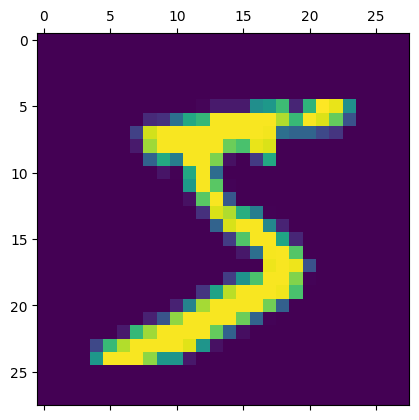

In [7]:
plt.matshow(x_train[0])

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10


2022-11-12 05:41:03.296096: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1862/1875 [============================>.] - ETA: 0s - loss: 0.6376 - accuracy: 0.8393

2022-11-12 05:41:09.566978: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6355 - accuracy: 0.8397 - val_loss: 0.3522 - val_accuracy: 0.9066
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3348 - accuracy: 0.9072 - val_loss: 0.2946 - val_accuracy: 0.9194
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2875 - accuracy: 0.9193 - val_loss: 0.2618 - val_accuracy: 0.9285
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9276 - val_loss: 0.2369 - val_accuracy: 0.9334
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2357 - accuracy: 0.9340 - val_loss: 0.2184 - val_accuracy: 0.9372
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2171 - accuracy: 0.9395 - val_loss: 0.2038 - val_accuracy: 0.9412
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2015 - accuracy: 0.9438 - val_loss: 0.1955 - val_accuracy: 0.9446
Epo

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

 44/313 [===>..........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.9339

2022-11-12 05:44:03.966839: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.1617 - accuracy: 0.9523
Loss=0.162
Accuracy=0.952


<function matplotlib.pyplot.show(close=None, block=None)>

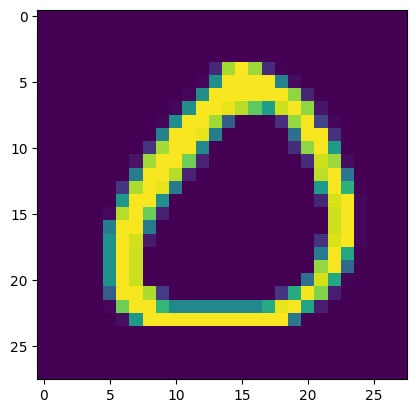

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [18]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

  1/313 [..............................] - ETA: 29s

2022-11-12 05:48:37.848104: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 964    0    0    1    0    4    7    2    1    1]
 [   0 1115    3    2    1    1    3    2    8    0]
 [   6    3  984    4   10    0    7    8    8    2]
 [   0    0   13  946    0   18    1   11   17    4]
 [   1    1    7    0  935    0    7    3    4   24]
 [   8    1    1   18    4  829   11    2   12    6]
 [   8    3    4    2    6    9  923    1    2    0]
 [   2    7   23    4    3    1    0  968    1   19]
 [   5    3    4   12    7    7    9    9  913    5]
 [   9    6    1   10   18    4    1    8    6  946]], shape=(10, 10), dtype=int32)
